### Data preprocessing

In [193]:
# khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [194]:
df=pd.read_csv('D:/Runway-Training-main/BE/dataset/DATA-ROT.csv')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3811 entries, 0 to 3810
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Exit-location   3811 non-null   float64
 1   Aircraft-type   3811 non-null   object 
 2   Final-approach  3811 non-null   int64  
 3   Exit-angle      3811 non-null   int64  
 4   Temperature     3811 non-null   int64  
 5   Time            3811 non-null   object 
 6   Windspeed       3811 non-null   int64  
 7   Visibility      3811 non-null   float64
 8   ROT             3810 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 268.1+ KB


In [196]:
# xóa duplicate
df.drop_duplicates(inplace=True)

In [197]:
df.dropna(inplace=True)

In [198]:
# Giá trị đúng cần làm tròn
true_value = [1750, 2997.63, 2086.35]

# Tạo một danh sách mới để lưu giá trị thay đổi
updated_exit_location = []
hash_tabel={1750 : 'A',
            2086.35 : 'B'}
exit_label=[]

# Lặp qua từng giá trị của cột 'Exit-location'
for value in df['Exit-location']:
    # Kiểm tra và làm tròn giá trị theo 'true_value'
    found = False
    for i in true_value:
        if abs(value - i) < 5:
            updated_exit_location.append(i)
            exit_label.append(hash_tabel[i])
            found = True
            break
    # Nếu không khớp với bất kỳ giá trị nào, giữ nguyên giá trị ban đầu
    if not found:
        updated_exit_location.append(value)

# Gán lại danh sách đã cập nhật vào cột 'Exit-location'
df['Exit-location'] = updated_exit_location
df['Exit-label']=exit_label

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3779 entries, 0 to 3810
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Exit-location   3779 non-null   float64
 1   Aircraft-type   3779 non-null   object 
 2   Final-approach  3779 non-null   int64  
 3   Exit-angle      3779 non-null   int64  
 4   Temperature     3779 non-null   int64  
 5   Time            3779 non-null   object 
 6   Windspeed       3779 non-null   int64  
 7   Visibility      3779 non-null   float64
 8   ROT             3779 non-null   float64
 9   Exit-label      3779 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 324.8+ KB


In [200]:
df['Exit-location'].unique()

array([2086.35, 1750.  ])

In [201]:
df.describe()

,Exit-location,Final-approach,Exit-angle,Temperature,Windspeed,Visibility,ROT
count,3779.000000,3779.000000,3779.0,3779.000000,3779.000000,3779.000000,3779.000000
mean,1990.580590,137.692776,30.0,28.785658,-1.203493,8.069701,57.868748
std,151.810275,16.797287,0.0,3.153073,5.038983,1.378762,4.721825
min,1750.000000,50.000000,30.0,22.000000,-15.000000,3.200000,40.000000
25%,1750.000000,135.000000,30.0,26.000000,-5.000000,7.000000,55.000000
50%,2086.350000,141.000000,30.0,29.000000,-2.000000,8.000000,58.000000
75%,2086.350000,147.000000,30.0,31.000000,2.000000,9.000000,61.000000
max,2086.350000,176.000000,30.0,35.000000,12.000000,10.000000,77.000000


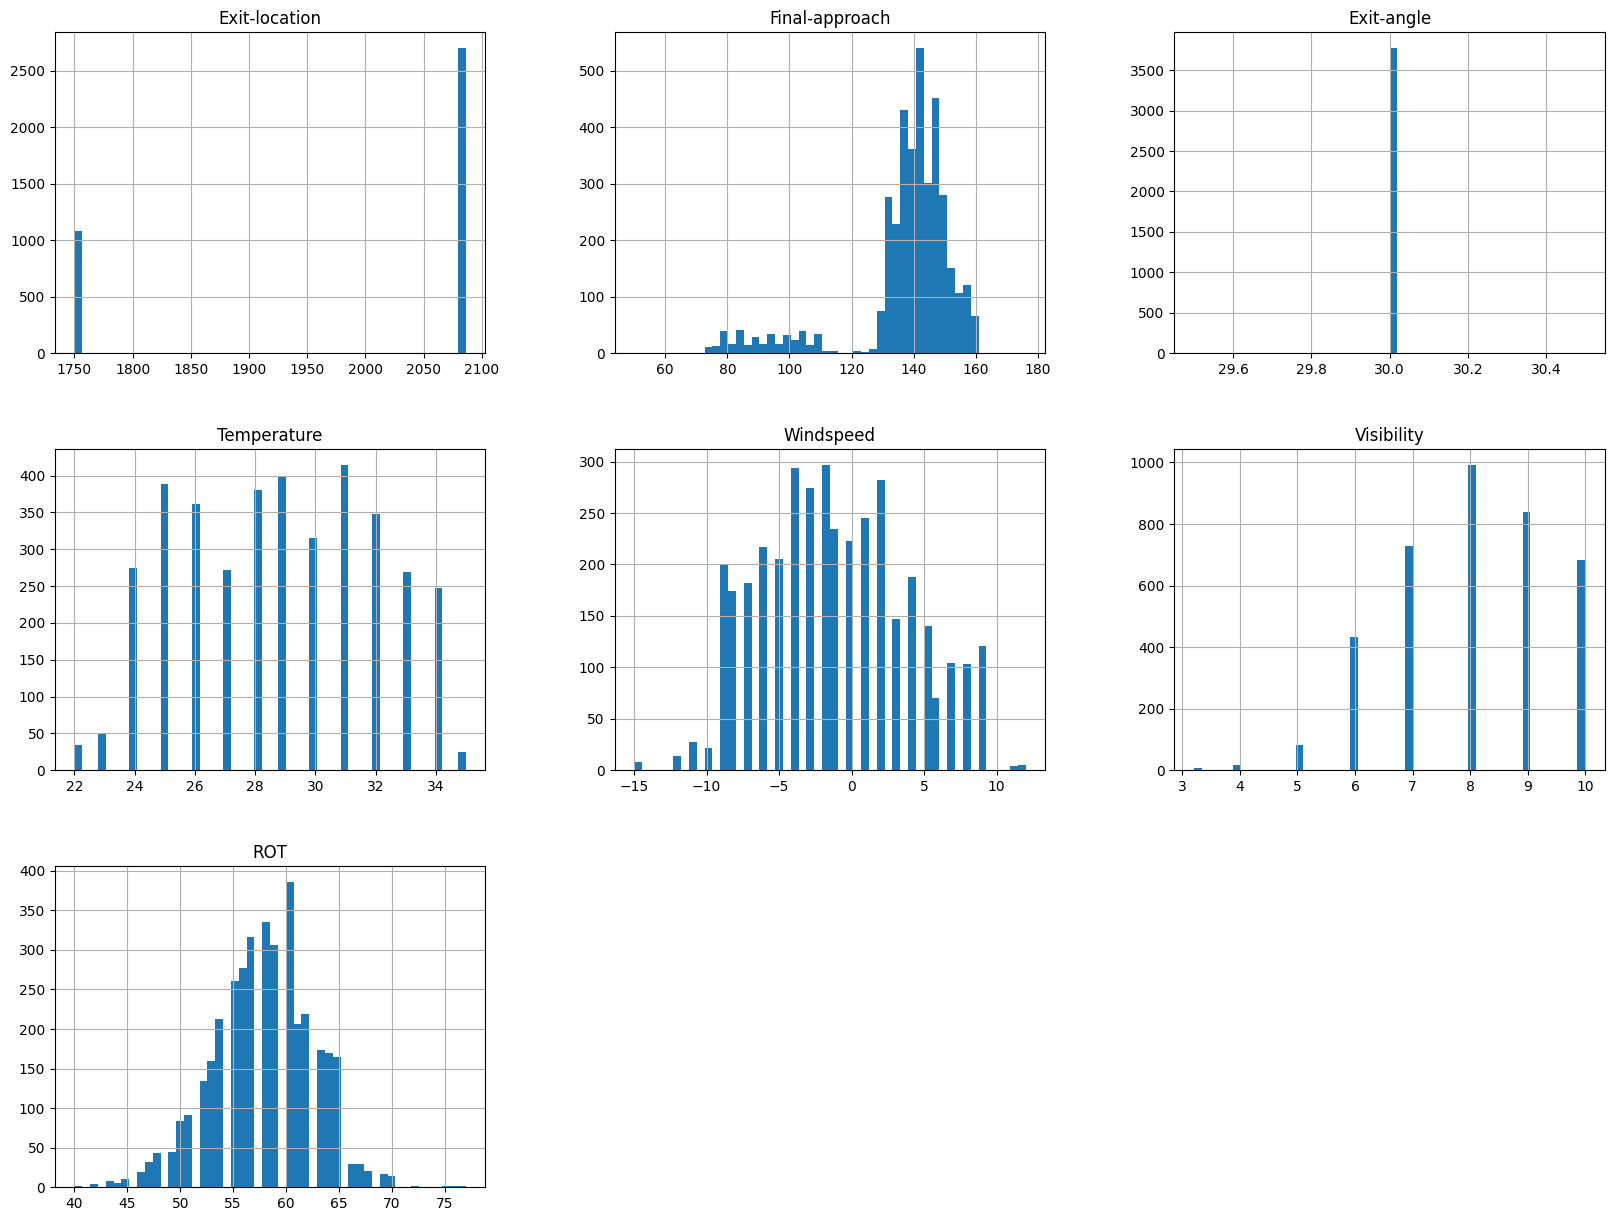

In [202]:
# kiểm tra phân phối dữ liệu
df.hist(bins=50,figsize=(20,15))
plt.show()

In [203]:
# encode các giá trị categorical
df_original=df.copy()
from sklearn.preprocessing import LabelEncoder
categorical_feature=['Aircraft-type','Time','Exit-label']
for feature in categorical_feature:
  le=LabelEncoder()
  df[feature]=le.fit_transform(df[feature])

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3779 entries, 0 to 3810
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Exit-location   3779 non-null   float64
 1   Aircraft-type   3779 non-null   int64  
 2   Final-approach  3779 non-null   int64  
 3   Exit-angle      3779 non-null   int64  
 4   Temperature     3779 non-null   int64  
 5   Time            3779 non-null   int64  
 6   Windspeed       3779 non-null   int64  
 7   Visibility      3779 non-null   float64
 8   ROT             3779 non-null   float64
 9   Exit-label      3779 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 324.8 KB


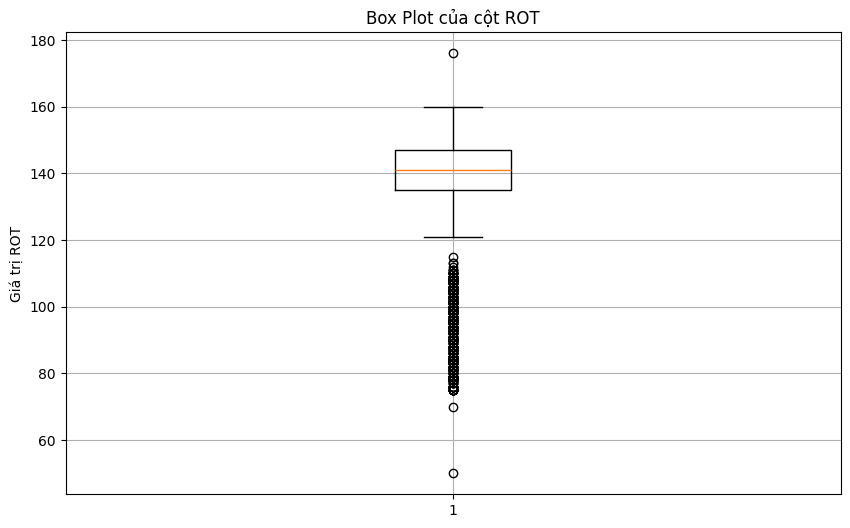

In [205]:
# vẽ box plot của cột ROT
plt.figure(figsize=(10, 6))
plt.boxplot(df['Final-approach'])
plt.title("Box Plot của cột ROT")
plt.ylabel("Giá trị ROT")
plt.grid()
plt.show()

In [206]:
import pandas as pd

# Giả sử df là DataFrame của bạn và cột cần lọc là 'Final-approach'
Q1 = df['Final-approach'].quantile(0.25)
Q3 = df['Final-approach'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc bỏ outliers
df_no_outlier = df[(df['Final-approach'] >= lower_bound) & (df['Final-approach'] <= upper_bound)]

print("Số lượng trước khi lọc:", len(df))
print("Số lượng sau khi lọc:", len(df_no_outlier))
print("Số lượng bị loại:", len(df) - len(df_no_outlier))

Số lượng trước khi lọc: 3779
Số lượng sau khi lọc: 3399
Số lượng bị loại: 380


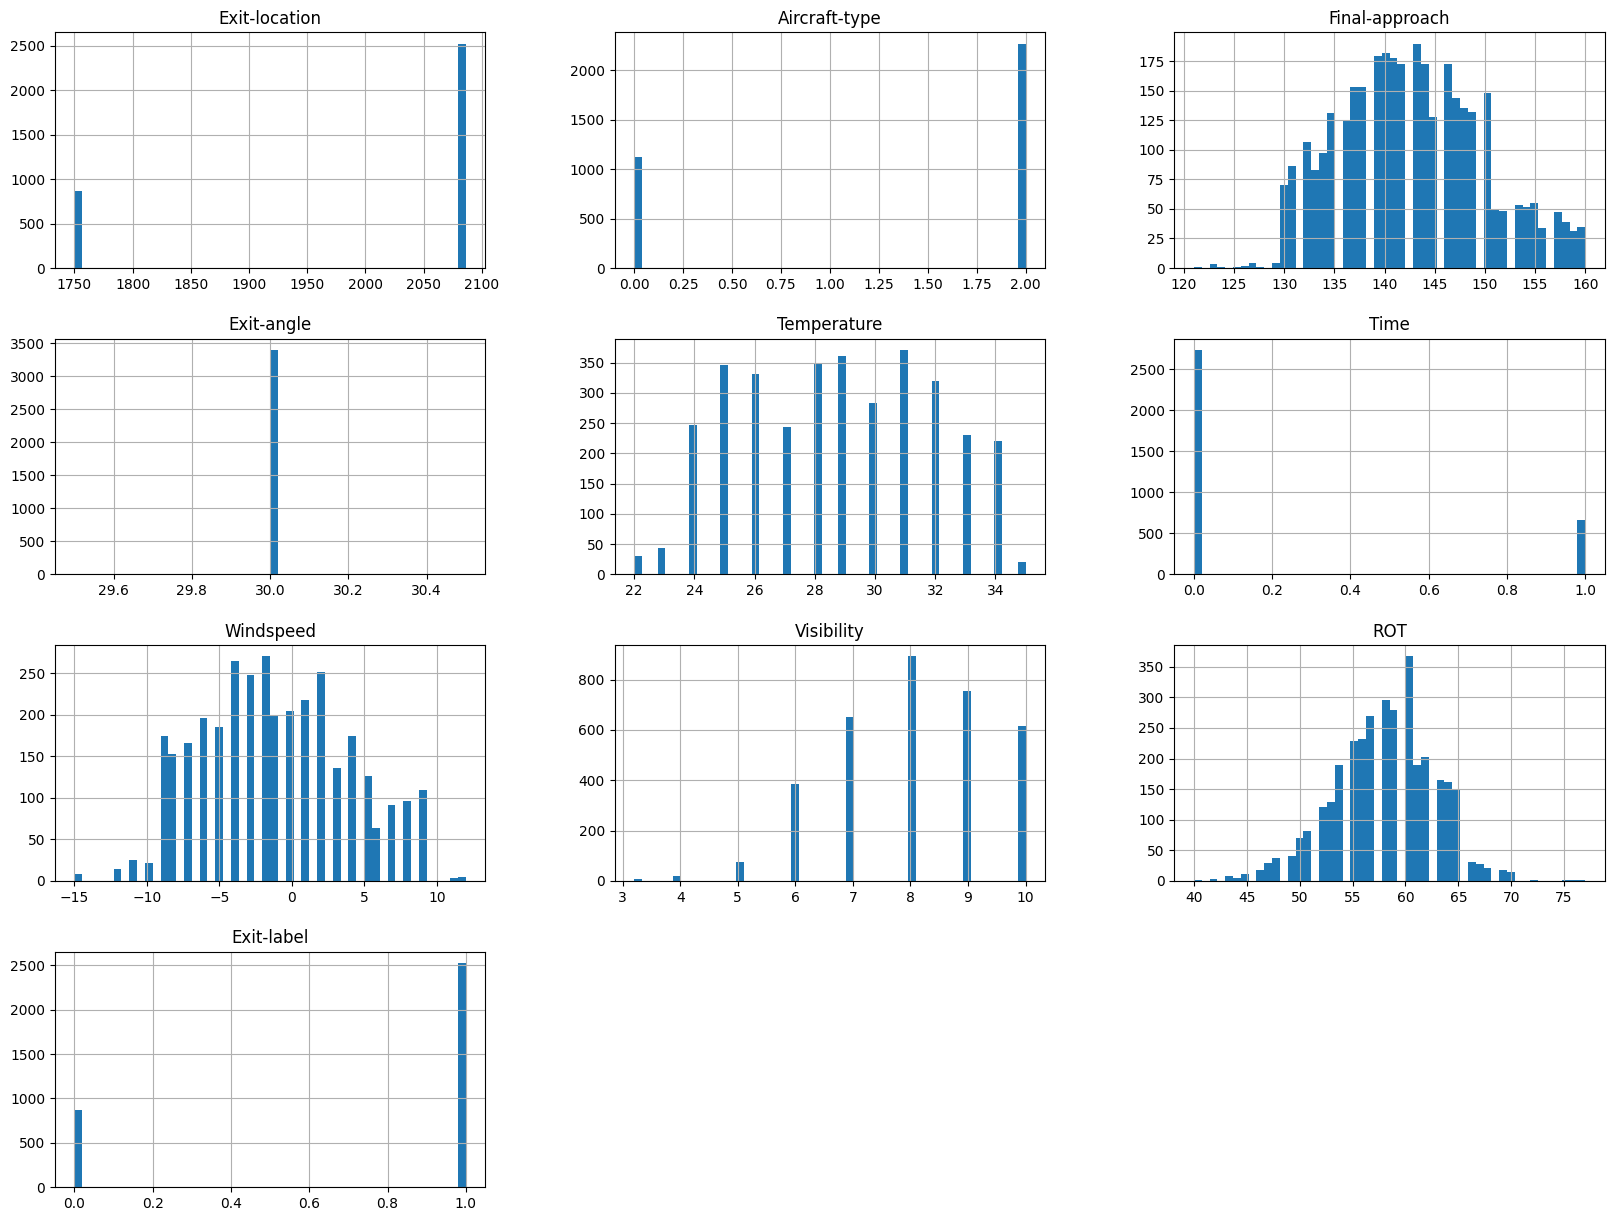

In [207]:
df = df_no_outlier.reset_index(drop=True)
df.hist(bins=50,figsize=(20,15))
plt.show()

In [208]:
df.reset_index(drop=True,inplace=True)


### RECURRENT NEURAL NETWORK for exit use

In [209]:
# Tạo dữ liệu
df = df.sample(frac=1).reset_index(drop=True)
aircraft_features=['Final-approach','Aircraft-type','Temperature','Time','Windspeed','Visibility']
runway_feautures=['Exit-location','Exit-angle']
aircraft_df=df[aircraft_features]
runway_df=df[runway_feautures]

In [210]:
runway_df.drop_duplicates(inplace=True)
# sắp xếp lại theo giá trị của exit location
runway_df.sort_values(by='Exit-location',inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20488\3970589878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.drop_duplicates(inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20488\3970589878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.sort_values(by='Exit-location',inplace=True)


In [211]:
runway_df

,Exit-location,Exit-angle
0,1750.00,30
1,2086.35,30


In [212]:
aircraft_df.reset_index(drop=True,inplace=True)
runway_df.reset_index(drop=True,inplace=True)
# Số đặc trưng
n = runway_df.shape[1]
m = aircraft_df.shape[1]

# Khởi tạo mảng 3 chiều
array_3d = np.zeros((len(aircraft_df), len(runway_df), n + m))

# Điền giá trị vào mảng
for i, plane in aircraft_df.iterrows():
    for j, runway in runway_df.iterrows():

        plane_features = plane[:].values
        # Lấy đặc trưng runway
        runway_features = runway[:].values
        # Ghép đặc trưng
        combined_features = np.concatenate((runway_features, plane_features))
        # Điền vào mảng
        array_3d[i, j, :] = combined_features

# Kết quả
print("Kích thước mảng:", array_3d.shape)
print(array_3d)

Kích thước mảng: (3399, 2, 8)
[[[1750.     30.    147.   ...    0.     -3.      7.  ]
  [2086.35   30.    147.   ...    0.     -3.      7.  ]]

 [[1750.     30.    134.   ...    0.     -4.      8.  ]
  [2086.35   30.    134.   ...    0.     -4.      8.  ]]

 [[1750.     30.    150.   ...    0.      3.      8.  ]
  [2086.35   30.    150.   ...    0.      3.      8.  ]]

 ...

 [[1750.     30.    146.   ...    0.      4.      8.  ]
  [2086.35   30.    146.   ...    0.      4.      8.  ]]

 [[1750.     30.    160.   ...    0.     -3.      6.  ]
  [2086.35   30.    160.   ...    0.     -3.      6.  ]]

 [[1750.     30.    141.   ...    0.      5.      9.  ]
  [2086.35   30.    141.   ...    0.      5.      9.  ]]]


In [213]:
# chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
N,seq_len,M=array_3d.shape
data_reshaped = array_3d.reshape(-1, M)  # Chuyển thành mảng 2D (N*3, M)

# Chuẩn hóa dữ liệu
scaler_pro = StandardScaler()
data_normalized = scaler_pro.fit_transform(data_reshaped)

# Chuyển đổi lại thành mảng 3D Nx3xM
data_normalized_3d = data_normalized.reshape(N, seq_len, M)


In [214]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


num_samples = N  # Số lượng mẫu dữ liệu
seq_len = data_normalized_3d.shape[1]  # Độ dài chuỗi
input_dim = data_normalized_3d.shape[2]  # Số đặc trưng mỗi bước
output_dim = data_normalized_3d.shape[1]  # Số lớp cần phân loại
batch_size = 256  # Kích thước batch

X_tensor = torch.tensor(data_normalized_3d,dtype=torch.float32)
y_tensor = torch.tensor(df['Exit-label'], dtype=torch.long)  # Cần dtype=torch.long cho CrossEntropyLoss

# Chia tập train/test
train_size = int(0.8 * num_samples)
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

# Tạo DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

class_counts = np.bincount(y_train.numpy())
class_weights = 1.0 / class_counts
weights = class_weights[y_train.numpy()]

# Tạo sampler
sampler = torch.utils.data.WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)

# Tạo DataLoader với sampler
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [215]:
class LSTMPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim=30, output_dim=4):
        super(LSTMPredictor, self).__init__()
        self.hidden_dim = hidden_dim

        # Lớp LSTM
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)

        # Lớp Fully Connected
        self.fc = nn.Linear(hidden_dim, output_dim)

        # Hàm Softmax sẽ được áp dụng trong loss function
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)  # lstm_out có shape (batch_size, seq_len, hidden_dim)
        lstm_out = torch.relu(lstm_out)  # Áp dụng ReLU
        output = self.fc(lstm_out)  # Lớp Fully Connected
        output = output[:, -1, :]  # Lấy output của bước cuối cùng
        score = self.softmax(output)
        return output,score  # Trả về logits (chưa áp dụng Softmax)

In [216]:
def train1(model, train_loader,test_loader,criterion,optimizer, batch_size,num_epochs=20):

  # Tạo sampler
  sampler = torch.utils.data.WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)

  # Tạo DataLoader với sampler
  train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)

  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
  model.train()
  losses = {"train":[],"test":[]}
  # Khởi tạo mô hình, loss function và optimizer
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)
  # Huấn luyện mô hình
  scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs*len(train_loader), eta_min=1e-5)
  for epoch in range(num_epochs):
      model.train()
      total_loss = 0

      for X_batch, y_batch in train_loader:
          X_batch, y_batch = X_batch.to(device), y_batch.to(device)

          # Forward
          outputs,score = model(X_batch)  # (batch_size, seq_len, output_dim)

          # Reshape để tính loss: từ (batch, seq, output_dim) → (batch*seq, output_dim)
          loss = criterion(outputs.view(-1, output_dim), y_batch.view(-1))

          # Backward
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          total_loss += loss.item()
          scheduler.step()
      _,_,test_losses=evaluate_model(model,test_loader)
      losses["train"].append(total_loss/len(train_loader))
      losses["test"].append(test_losses)
      if epoch%10==0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}")
  # visualize loss for each epoch
  plt.plot(losses["train"],label="train")
  plt.plot(losses["test"],label="test")
  plt.legend()
  plt.show()


In [217]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
def evaluate_model(model, test_loader):
  device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)
  model.eval()
  y_true, y_pred = [], []
  losses = 0
  with torch.no_grad():
      for X_batch, y_batch in test_loader:
          X_batch, y_batch = X_batch.to(device), y_batch.to(device)

          outputs,score = model(X_batch)  # (batch_size, seq_len, output_dim)
          predicted_labels = torch.argmax(score, dim=-1)  # Lấy nhãn có xác suất cao nhất
          loss = criterion(outputs.view(-1, output_dim), y_batch.view(-1))
          losses += loss.item()
          y_true.extend(y_batch.cpu().numpy().flatten())  # Flatten vì mỗi mẫu có seq_len nhãn
          y_pred.extend(predicted_labels.cpu().numpy().flatten())

  # Đánh giá bằng Accuracy
  accuracy = accuracy_score(y_true, y_pred)
  f1_score_macro = f1_score(y_true, y_pred, average='macro')
  print(classification_report(y_true,y_pred))
  return accuracy,f1_score_macro,losses/len(test_loader)


              precision    recall  f1-score   support

           0       0.42      0.94      0.58       185
           1       0.96      0.51      0.67       495

    accuracy                           0.63       680
   macro avg       0.69      0.73      0.62       680
weighted avg       0.81      0.63      0.64       680

Epoch [1/100], Loss: 0.7005
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       185
           1       1.00      0.28      0.44       495

    accuracy                           0.48       680
   macro avg       0.67      0.64      0.48       680
weighted avg       0.82      0.48      0.46       680

              precision    recall  f1-score   support

           0       0.34      1.00      0.50       185
           1       1.00      0.26      0.41       495

    accuracy                           0.46       680
   macro avg       0.67      0.63      0.46       680
weighted avg       0.82      0.46      0.44   

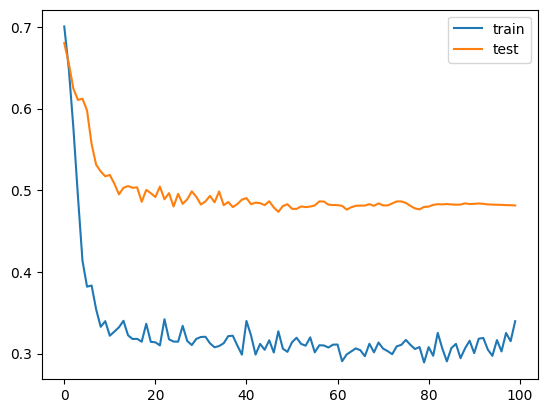

In [218]:
# Tính toán trọng số cho từng lớp
class_counts = np.bincount(y_train.numpy())  # Đếm số lượng mẫu của từng lớp
class_weights = 1.0 / class_counts           # Trọng số ngược với tần suất
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # get the device
class_weights = torch.tensor(class_weights, dtype=torch.float32, device=device) # Move class_weights to the device

model_pro = LSTMPredictor(input_dim, hidden_dim=85, output_dim=output_dim)
criterion = nn.CrossEntropyLoss(weight=class_weights)  # Loss cho bài toán phân loại
optimizer = optim.Adam(model_pro.parameters(), lr=5e-4, weight_decay=1e-3)
train1(model_pro,train_loader=train_loader,test_loader = test_loader,criterion=criterion,optimizer=optimizer,batch_size=128,num_epochs=100)

* Nhận xét: Mô hình hội tụ và không có dấu hiệu overfitting

In [219]:
acc,f1,losses=evaluate_model(model_pro,test_loader)
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1 Score (macro): {f1:.4f}")
print(f"Test Loss: {losses:.4f}")

              precision    recall  f1-score   support

           0       0.47      0.96      0.63       185
           1       0.97      0.60      0.74       495

    accuracy                           0.70       680
   macro avg       0.72      0.78      0.69       680
weighted avg       0.84      0.70      0.71       680

Test Accuracy: 0.6956
Test F1 Score (macro): 0.6860
Test Loss: 0.4715


#### Thử nghiệm batch_size

In [220]:
# batch_sizes = [16, 32, 64, 128, 256]
# for batch_size in batch_sizes:
#     print(f"Batch Size: {batch_size}")
#     model_pro = LSTMPredictor(input_dim, hidden_dim=85, output_dim=output_dim)
#     criterion = nn.CrossEntropyLoss(weight=class_weights)  # Loss cho bài toán phân loại
#     optimizer = optim.Adam(model_pro.parameters(), lr=1e-3, weight_decay=5e-4) # Dùng weight decay để tránh overfitting
#     train1(model_pro,train_loader=train_loader,test_loader= test_loader,criterion=criterion,optimizer=optimizer,batch_size=batch_size,num_epochs=100)
#     print("="*100)
#     acc,f1,losses=evaluate_model(model_pro,test_loader=test_loader)
#     print(f"Test Accuracy: {acc:.4f}")
#     print(f"Test F1 Score (macro): {f1:.4f}")
#     print(f"Test Loss: {losses:.4f}")
#     print("="*100)

* Training model với các tham số tối ưu

              precision    recall  f1-score   support

           0       0.33      0.99      0.49       185
           1       0.99      0.23      0.38       495

    accuracy                           0.44       680
   macro avg       0.66      0.61      0.43       680
weighted avg       0.81      0.44      0.41       680

Epoch [1/100], Loss: 0.6795
              precision    recall  f1-score   support

           0       0.32      1.00      0.49       185
           1       1.00      0.22      0.36       495

    accuracy                           0.43       680
   macro avg       0.66      0.61      0.42       680
weighted avg       0.82      0.43      0.39       680

              precision    recall  f1-score   support

           0       0.33      1.00      0.49       185
           1       1.00      0.23      0.38       495

    accuracy                           0.44       680
   macro avg       0.66      0.62      0.44       680
weighted avg       0.82      0.44      0.41   

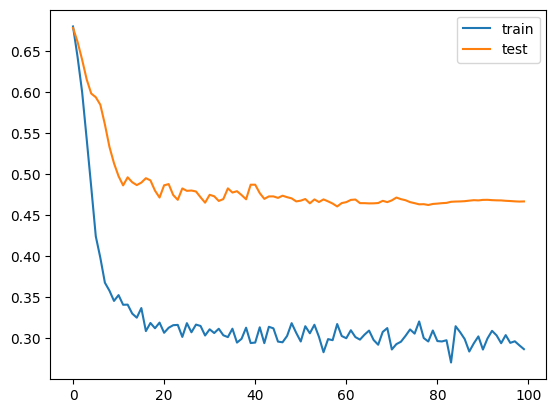

              precision    recall  f1-score   support

           0       0.48      0.96      0.64       185
           1       0.97      0.61      0.75       495

    accuracy                           0.70       680
   macro avg       0.73      0.78      0.69       680
weighted avg       0.84      0.70      0.72       680

Test Accuracy: 0.7029
Test F1 Score (macro): 0.6927
Test Loss: 0.4667


In [221]:
# Tính toán trọng số cho từng lớp
class_counts = np.bincount(y_train.numpy())  # Đếm số lượng mẫu của từng lớp
class_weights = 1.0 / class_counts           # Trọng số ngược với tần suất
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # get the device
class_weights = torch.tensor(class_weights, dtype=torch.float32, device=device) # Move class_weights to the device

model_pro = LSTMPredictor(input_dim, hidden_dim=85, output_dim=output_dim)
criterion = nn.CrossEntropyLoss(weight=class_weights)  # Loss cho bài toán phân loại
optimizer = optim.Adam(model_pro.parameters(), lr=8e-4, weight_decay=5e-4)
train1(model_pro,train_loader=train_loader,test_loader=test_loader,criterion=criterion,optimizer=optimizer,batch_size=256,num_epochs=100)
acc,f1,losses=evaluate_model(model_pro,test_loader= test_loader)
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1 Score (macro): {f1:.4f}")
print(f"Test Loss: {losses:.4f}")
print("="*100)

###

### Neural network for ROT prediction

#### ROT MEAN

In [222]:
import pandas as pd

# Tính số lượng mẫu của từng lớp
class_counts = df['Exit-label'].value_counts()
max_count = class_counts.max()

# Tạo một DataFrame mới để lưu dữ liệu đã cân bằng
balanced_df = pd.DataFrame()

# Lặp qua từng lớp và nhân bản mẫu để đạt số lượng bằng max_count
for cls, count in class_counts.items():
    cls_data = df[df['Exit-label'] == cls]
    cls_oversampled = cls_data.sample(n=max_count, replace=True, random_state=42)  # Oversampling
    balanced_df = pd.concat([balanced_df, cls_oversampled])

# Shuffle lại dữ liệu sau khi cân bằng
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Kết quả
print("Số lượng mẫu sau khi cân bằng:")
print(balanced_df['Exit-label'].value_counts())

Số lượng mẫu sau khi cân bằng:
Exit-label
1    2527
0    2527
Name: count, dtype: int64


In [223]:
X,y=balanced_df.drop(['ROT','Exit-label'],axis=1),balanced_df['ROT']
features = ['Exit-location','Exit-angle','Final-approach','Aircraft-type','Temperature','Time','Windspeed','Visibility']
X = X[features]

In [224]:
X

,Exit-location,Exit-angle,Final-approach,Aircraft-type,Temperature,Time,Windspeed,Visibility
0,2086.35,30,146,2,29,0,-2,7.0
1,2086.35,30,137,2,31,0,-15,10.0
2,2086.35,30,139,0,31,0,5,8.0
3,2086.35,30,135,2,30,1,9,8.0
4,2086.35,30,146,0,25,0,1,10.0
...,...,...,...,...,...,...,...,...
5049,1750.00,30,144,2,27,0,-6,8.0
5050,2086.35,30,141,0,34,1,3,7.0
5051,1750.00,30,142,2,26,1,-4,9.0
5052,1750.00,30,134,2,29,0,-2,9.0


In [225]:
# chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
# Chuẩn hóa dữ liệu
scaler_rot = StandardScaler()
data_normalized = scaler_rot.fit_transform(X)

num_samples = data_normalized.shape[0]  # Số lượng mẫu dữ liệu

input_dim = data_normalized.shape[1]

X_tensor = torch.tensor(data_normalized,dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Chia tập train/test
train_size = int(0.8 * num_samples)
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]


In [226]:
# 1. Định nghĩa mô hình neural network
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_units):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units)
        self.gelu = nn.GELU()  # Activation function
        self.fc2 = nn.Linear(hidden_units, hidden_units)  # Output layer for regression
        self.fc3 = nn.Linear(hidden_units, 1)  # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.gelu(x)
        x = self.fc2(x)
        x = self.gelu(x)
        x = self.fc3(x)
        return x

# 2. Hàm bootstrap sampling
def bootstrap_sample(X, y, sample_size):
    indices = np.random.choice(len(X), size=sample_size, replace=True)
    return X[indices], y[indices]

# 3. Huấn luyện từng mô hình con
def train_single_model(X_train, y_train, input_size, hidden_units, epochs=50, batch_size=32, lr=0.002):
    # Dataloader
    dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # Khởi tạo mô hình
    model = NeuralNetwork(input_size, hidden_units)
    model.train()
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr,weight_decay=1e-4)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs*len(dataloader), eta_min=1e-5)
    # Huấn luyện
    for epoch in range(epochs):
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            predictions = model(X_batch).squeeze()
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            scheduler.step()

    return model


In [435]:
n_features

8

In [ ]:
checkpoint_dir= "D:/Runway-Training-main/BE/checkpoint/"
n_samples = X_tensor.shape[0]
n_features = X_tensor.shape[1]
# 5. Tạo và huấn luyện 100 mô hình con
num_models = 70
models = []
input_size = n_features
hidden_units_list = []
for i in range(num_models):
    # Bootstrap sample
    X_sample, y_sample = bootstrap_sample(X_train, y_train, sample_size=n_samples)
    # Số lượng hidden units ngẫu nhiên từ 50 đến 700
    hidden_units = np.random.randint(100, 500)
    hidden_units_list.append(hidden_units)
    print(f"Training model {i+1}/{num_models} with {hidden_units} hidden units...")
    # Huấn luyện mô hình
    model = train_single_model(X_sample, y_sample, input_size, hidden_units,epochs=50,batch_size = 128, lr= 2e-3)
    models.append(model)
checkpoint = {
    "num_models": num_models,
    "model_states": [model.state_dict() for model in models],  # trạng thái từng model
    "hidden_units": hidden_units_list,
    "input_size": input_size,
    "scaler":scaler_rot
}
torch.save(checkpoint, checkpoint_dir+"ensemble_checkpoint.pth")
print("✅ Saved ensemble checkpoint to ensemble_checkpoint.pth")
# 6. Dự đoán với ensemble models
def predict_ensemble(models, X_test):
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    X_test_tensor = X_test_tensor.to(device)
    predictions = []
    with torch.no_grad():
        for model in models:
            predictions.append(model(X_test_tensor).cpu().numpy())
    # Trung bình kết quả từ tất cả các mô hình con
    return np.mean(predictions, axis=0),np.var(np.array(predictions),axis=0,ddof=1)


✅ Saved ensemble checkpoint to ensemble_checkpoint.pth


In [228]:
# Load checkpoint
checkpoint = torch.load("D:/Runway-Training-main/BE/checkpoint/ensemble_checkpoint.pth", map_location=device)

num_models = checkpoint["num_models"]
hidden_units_list = checkpoint["hidden_units"]
input_size = checkpoint["input_size"]

# Khởi tạo lại mô hình giống như lúc train và load weight
loaded_models = []
for i in range(num_models):
    model = NeuralNetwork(input_size=input_size, hidden_units=hidden_units_list[i]).to(device)  # định nghĩa lớp MLP giống y chang lúc train
    model.load_state_dict(checkpoint["model_states"][i])
    model.eval()
    loaded_models.append(model)

print(f"✅ Loaded ensemble with {len(loaded_models)} models")

✅ Loaded ensemble with 70 models


In [229]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred,_ = predict_ensemble(loaded_models,X_test)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

15.423661231994629
3.0649526119232178


#### ROT VARIANCE

##### Predict error variance

In [230]:
class CustomLikelihoodLoss(nn.Module):
    def __init__(self):
        super(CustomLikelihoodLoss, self).__init__()

    def forward(self, y_truth, mean_ROT, variance_ROT, predicted_variance_err):
        # Đảm bảo các tensor được đồng bộ hóa
        mean_ROT = torch.tensor(mean_ROT, device=y_truth.device, dtype=y_truth.dtype)
        predicted_variance_err = torch.nn.functional.softplus(predicted_variance_err)  # Đảm bảo dương

        # Tính residuals bình phương
        r_2 = (mean_ROT - y_truth) ** 2

        # Log của phương sai
        log_variances = torch.log(predicted_variance_err + 1e-6)  # Thêm epsilon

        # Tính loss
        loss = 0.5 * (log_variances + r_2 / (predicted_variance_err + 1e-6))

        # Giá trị trung bình trên batch
        return torch.mean(loss)

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_units):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units)
        self.tanh = nn.Tanh()  # Activation function
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_units,1)   # Output layer for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.relu(x)
        return x

In [231]:
epochs=50
lr=1e-3
hidden_units = 150
np.random.seed(42)
batch_size=32

dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Khởi tạo mô hình
model_err = NeuralNetwork(input_size, hidden_units)
model_err.train()
model_err.to(device)
criterion = CustomLikelihoodLoss()
optimizer = optim.Adam(model_err.parameters(), lr=lr,weight_decay=1e-3)
losses=[]
# Huấn luyện
for epoch in range(epochs):
    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()

        predictions = model_err(X_batch).squeeze()
        mean_ROT,variance_ROT=predict_ensemble(models,X_batch)

        loss = criterion(y_batch,mean_ROT,variance_ROT,predictions)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
print(f"Epoch [{epoch+1}/{epochs}], Loss: {np.mean(losses):.4f}")


Epoch [50/50], Loss: 2.5995


##### Predict on regional data

In [232]:
X,y=df.drop(['ROT','Exit-label'],axis=1),df['ROT']
features = ['Exit-location','Exit-angle','Final-approach','Aircraft-type','Temperature','Time','Windspeed','Visibility']
X = X[features]

In [233]:
df

,Exit-location,Aircraft-type,Final-approach,Exit-angle,Temperature,Time,Windspeed,Visibility,ROT,Exit-label
0,1750.00,2,147,30,24,0,-3,7.0,54.0,0
1,2086.35,2,134,30,30,0,-4,8.0,57.0,1
2,2086.35,0,150,30,24,0,3,8.0,58.0,1
3,2086.35,0,158,30,31,1,6,8.0,59.0,1
4,2086.35,2,137,30,29,0,5,8.0,58.0,1
...,...,...,...,...,...,...,...,...,...,...
3394,2086.35,0,160,30,31,0,9,7.0,64.0,1
3395,2086.35,0,147,30,23,0,8,9.0,64.0,1
3396,2086.35,0,146,30,27,0,4,8.0,56.0,1
3397,2086.35,0,160,30,23,0,-3,6.0,47.0,1


In [234]:
# Chuẩn hóa dữ liệu
data_normalized = scaler_rot.transform(X)
num_samples = data_normalized.shape[0]  # Số lượng mẫu dữ liệu

input_dim = data_normalized.shape[1]

X_tensor = torch.tensor(data_normalized,dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [235]:
rot_pred,_ = predict_ensemble(models,X_tensor)

In [236]:
rot_pred.shape

(3399, 1)

In [237]:
mean_squared_error(y_tensor,rot_pred)

15.155638694763184

In [238]:
df['ROT_pred']=rot_pred

#### Kullback Leibler Divergence

##### create dataset

In [438]:
# Tạo dữ liệu
aircraft_features=['Final-approach','Aircraft-type','Temperature','Time','Windspeed','Visibility']
runway_feautures=['Exit-location','Exit-angle']
aircraft_df=df[aircraft_features]
runway_df=df[runway_feautures]

In [439]:
runway_df.drop_duplicates(inplace=True)
# sắp xếp lại theo giá trị của exit location
runway_df.sort_values(by='Exit-location',inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20488\3970589878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.drop_duplicates(inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20488\3970589878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.sort_values(by='Exit-location',inplace=True)


In [440]:
runway_df

,Exit-location,Exit-angle
0,1750.00,30
1,2086.35,30


In [441]:
aircraft_df.reset_index(drop=True,inplace=True)
runway_df.reset_index(drop=True,inplace=True)
# Số đặc trưng
n = runway_df.shape[1]
m = aircraft_df.shape[1]

# Khởi tạo mảng 3 chiều
array_3d = np.zeros((len(aircraft_df), len(runway_df), n + m))

# Điền giá trị vào mảng
for i, plane in aircraft_df.iterrows():
    for j, runway in runway_df.iterrows():

        plane_features = plane[:].values
        # Lấy đặc trưng runway
        runway_features = runway[:].values
        # Ghép đặc trưng
        combined_features = np.concatenate((runway_features, plane_features))
        # Điền vào mảng
        array_3d[i, j, :] = combined_features

# Kết quả
print("Kích thước mảng:", array_3d.shape)
print(array_3d)

Kích thước mảng: (3399, 2, 8)
[[[1750.     30.    147.   ...    0.     -3.      7.  ]
  [2086.35   30.    147.   ...    0.     -3.      7.  ]]

 [[1750.     30.    134.   ...    0.     -4.      8.  ]
  [2086.35   30.    134.   ...    0.     -4.      8.  ]]

 [[1750.     30.    150.   ...    0.      3.      8.  ]
  [2086.35   30.    150.   ...    0.      3.      8.  ]]

 ...

 [[1750.     30.    146.   ...    0.      4.      8.  ]
  [2086.35   30.    146.   ...    0.      4.      8.  ]]

 [[1750.     30.    160.   ...    0.     -3.      6.  ]
  [2086.35   30.    160.   ...    0.     -3.      6.  ]]

 [[1750.     30.    141.   ...    0.      5.      9.  ]
  [2086.35   30.    141.   ...    0.      5.      9.  ]]]


##### evaluate for a landing aircraft

In [442]:
idx_random=np.random.randint(0,len(df))
df_original.loc[idx_random]

Exit-location     1750.0
Aircraft-type     Medium
Final-approach       151
Exit-angle            30
Temperature           27
Time                 Day
Windspeed              3
Visibility           8.0
ROT                 44.0
Exit-label             A
Name: 22, dtype: object

In [443]:
X_sample = array_3d[idx_random]

X_normalized_pro = scaler_pro.transform(X_sample)
X_normalized_rot = scaler_rot.transform(X_sample)

X_normalized_pro = torch.tensor(X_normalized_pro,dtype=torch.float32)
X_normalized_pro=X_normalized_pro.to(device)

X_normalized_rot = torch.tensor(X_normalized_rot,dtype=torch.float32)
X_normalized_rot=X_normalized_rot.to(device)

means,variances=predict_ensemble(models,X_normalized_rot)
variances_err=model_err(X_normalized_rot).squeeze()
variances_err=variances_err.cpu().detach().numpy()


X_normalized_pro=X_normalized_pro.unsqueeze(0)
_,probabilities = model_pro(X_normalized_pro)
probabilities=probabilities.cpu().detach().numpy()
means=means.squeeze()

In [444]:
print("Probability of random landing aircraft: ",probabilities)
print("Mean ROT of random landing aircraft: ",means)
print("Variance ROT of random landing aircraft: ",variances)
print("Error variance of random landing aircraft: ",variances_err)

Probability of random landing aircraft:  [[0.8867108  0.11328918]]
Mean ROT of random landing aircraft:  [52.208992 58.332714]
Variance ROT of random landing aircraft:  [[0.37602276]
 [0.95403135]]
Error variance of random landing aircraft:  [30.474129 27.39125 ]


##### evaluate for Runway

In [445]:
N,seq_len,M=array_3d.shape

data_reshaped = array_3d.reshape(-1, M)  # Chuyển thành mảng 2D (N*3, M)

data_normalized_pro=scaler_pro.transform(data_reshaped)
data_normalized_rot = scaler_rot.transform(data_reshaped)

# Chuyển đổi lại thành mảng 3D Nx3xM
data_normalized_3d_pro = data_normalized_pro.reshape(N, seq_len, M)
data_normalized_3d_rot = data_normalized_rot.reshape(N, seq_len, M)

In [446]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_tensor_pro = torch.tensor(data_normalized_3d_pro,dtype=torch.float32)
X_tensor_pro=X_tensor_pro.to(device)
X_tensor_rot = torch.tensor(data_normalized_3d_rot,dtype=torch.float32)
X_tensor_rot=X_tensor_rot.to(device)
y_tensor_exit = torch.tensor(df['Exit-label'], dtype=torch.long)  # Cần dtype=torch.long cho CrossEntropyLoss
y_tensor_rot = torch.tensor(df['ROT'], dtype=torch.float32)

In [447]:
array_3d.shape

(3399, 2, 8)

In [448]:
means,variances=predict_ensemble(models,X_tensor_rot)
variances_err=model_err(X_tensor_rot).squeeze()
variances_err=variances_err.cpu().detach().numpy()
variances=variances.squeeze()
variances = variances + variances_err
_,probabilities = model_pro(X_tensor_pro)
probabilities=probabilities.cpu().detach().numpy()
means=means.squeeze()
print(probabilities.shape)
print(variances.shape)
print(means.shape)

(3399, 2)
(3399, 2)
(3399, 2)


In [449]:
k=variances.squeeze()
k.shape

(3399, 2)

In [450]:
print(probabilities.shape)
print(variances.shape)
print(means.shape)

(3399, 2)
(3399, 2)
(3399, 2)


In [451]:
mean_ROT = torch.mean(y_tensor_rot).detach().numpy()
std_ROT = torch.std(y_tensor_rot).detach().numpy()

In [452]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
import builtins

def overall_distribution(mean, var, prob):
    """
    Tính mean và var tổng thể của ROT cho toàn bộ sân bay.

    Args:
        mean: numpy array kích thước (N, 3)
        var:  numpy array kích thước (N, 3)
        prob: numpy array kích thước (N, 3)

    Returns:
        overall_mean: float, mean tổng thể
        overall_var: float, var tổng thể
    """
    N = mean.shape[0]  # số lượng máy bay
    # Vì mỗi hàng prob có tổng = 1 nên tổng các trọng số trên toàn bộ dữ liệu là N.
    overall_mean = np.sum(prob * mean) / N
    overall_second_moment = np.sum(prob * (var + mean**2)) / N
    overall_var = overall_second_moment - overall_mean**2
    return overall_mean, np.sqrt(overall_var)

def P_norm(x, mean, std):
    """Calculates the probability density for real ROT."""
    return norm.pdf(x, loc=mean, scale=std)

def kl_divergence_continuous(p_func, y_rot,mean_real,std_real,mean_pred,std_pred):
    """
    Tính KL Divergence giữa hai hàm phân phối P(x) và Q(x) sử dụng numpy.

    Args:
        p_func (function): Hàm phân phối thực P(x).
        q_func (function): Hàm phân phối dự đoán Q(x).
        x_range (tuple): Miền giá trị của x, ví dụ: (a, b).
        num_samples (int): Số mẫu để lấy x trong khoảng [a, b].

    Returns:
        float: Giá trị KL Divergence.
    """
    # Lấy mẫu x đều trong khoảng x_range


    # Tính giá trị P(x) và Q(x)
    p = p_func(y_rot,mean_real,std_real)
    q = p_func(y_rot,mean_pred,std_pred)

    # Đảm bảo P(x) và Q(x) là xác suất hợp lệ (tổng tích phân ~ 1)
    p = p / np.sum(p)
    q = q / np.sum(q)

    # Thêm epsilon để tránh log(0) hoặc chia cho 0
    epsilon = 1e-10
    p = p + epsilon
    q = q + epsilon

    # Tính KL Divergence: sum(P(x) * log(P(x) / Q(x)))
    kl = np.sum(p * np.log(p / q))
    return kl
overall_mean, overall_std = overall_distribution(means, variances, probabilities)
print(f"Overall Mean: {overall_mean}")
print(f"Overall Variance: {overall_std}")
kl_value=kl_divergence_continuous(P_norm, df['ROT'],mean_ROT, std_ROT,overall_mean,overall_std)
print(f"KL Divergence: {kl_value}")

Overall Mean: 57.259193420410156
Overall Variance: 6.354362964630127
KL Divergence: 0.016227032503347602


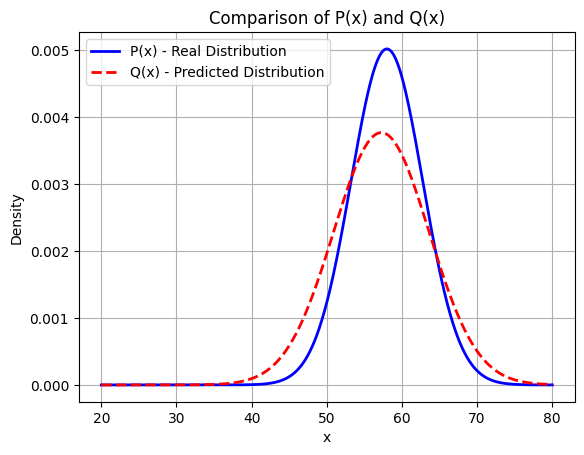

In [453]:
def plot_two_distributions(p_func,mean_real,std_real,mean_pred,std_pred,x_range, num_points=1000):
    """
    Vẽ hai đường phân phối P(x) và Q(x).

    Args:
        p_func (function): Hàm phân phối P(x).
        q_func (function): Hàm phân phối Q(x).
        x_range (tuple): Miền giá trị x để vẽ các đường phân phối.
        num_points (int): Số điểm để tính giá trị của P(x) và Q(x).
    """
    # Tạo miền giá trị x
    x = np.linspace(x_range[0], x_range[1], num_points)


    # Tính giá trị của P(x) và Q(x)
    p_values = p_func(x,mean_real,std_real)
    q_values = p_func(x,mean_pred,std_pred)

    # Đảm bảo P(x) và Q(x) là xác suất hợp lệ (tổng tích phân ~ 1)
    p_values = p_values / np.sum(p_values)
    q_values = q_values / np.sum(q_values)

    # Vẽ đường phân phối P(x)
    plt.plot(x, p_values, label="P(x) - Real Distribution", color="blue", linewidth=2)

    # Vẽ đường phân phối Q(x)
    plt.plot(x, q_values, label="Q(x) - Predicted Distribution", color="red", linestyle="--", linewidth=2)

    # Thêm nhãn và tiêu đề
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.title("Comparison of P(x) and Q(x)")
    plt.legend()
    plt.grid(True)
    plt.show()
x_range=[20,80]
plot_two_distributions(P_norm,mean_ROT, std_ROT,overall_mean,overall_std,x_range, num_points=1000)


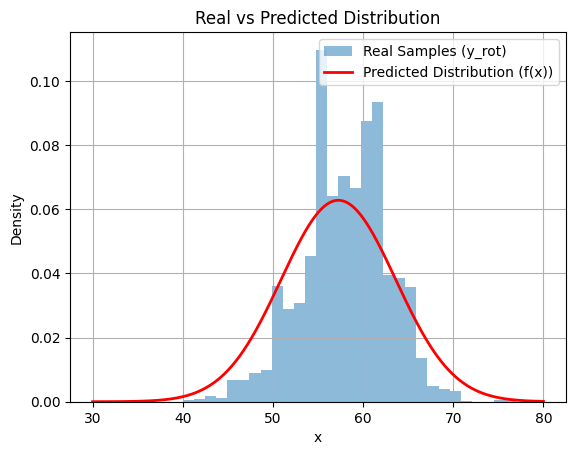

In [454]:
def plot_distribution(y_rot, f_func, x_range,mean_pred,std_pred, num_points=1000, bins=30):
    """
    Vẽ phân phối thực tế từ mẫu y_rot và đường phân phối dự đoán từ f(x).

    Args:
        y_rot (array-like): Mẫu thực tế.
        f_func (function): Hàm phân phối dự đoán f(x).
        x_range (tuple): Miền giá trị x để vẽ đường dự đoán.
        num_points (int): Số điểm để tính giá trị của f(x).
        bins (int): Số lượng bins trong histogram.
    """
    # tạo miền giá trị x
    x = np.linspace(x_range[0], x_range[1], num_points)
    # Tính giá trị của hàm phân phối dự đoán f(x)
    f_values = f_func(x,mean_pred,std_pred)
    f_values /= (np.sum(f_values) * np.diff(x[:2]))

    # Vẽ histogram của y_rot (mẫu thực tế)
    plt.hist(y_rot, bins=bins, density=True, alpha=0.5, label="Real Samples (y_rot)")

    # Vẽ đường phân phối dự đoán f(x)
    plt.plot(x, f_values, label="Predicted Distribution (f(x))", color="red", linewidth=2)

    # Thêm nhãn và tiêu đề
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.title("Real vs Predicted Distribution")
    plt.legend()
    plt.grid(True)
    plt.show()

x_range=[30,80]
plot_distribution(df['ROT'], P_norm, x_range,overall_mean,overall_std, num_points=1000, bins=30)

### RECOMMENDATION

#### Data Preparing

In [455]:
def aggregate_rot_statistics(mean, var, prob):
    """
    Tính mean và var tổng hợp của ROT cho từng lối thoát.

    Args:
        mean: numpy array kích thước (N, 3), chứa mean ROT của N máy bay cho 3 lối thoát.
        var:  numpy array kích thước (N, 3), chứa phương sai ROT của N máy bay cho 3 lối thoát.
        prob: numpy array kích thước (N, 3), chứa xác suất sử dụng 3 lối thoát của N máy bay.

    Returns:
        aggregated_mean: numpy array kích thước (3,), mean tổng hợp cho từng lối thoát.
        aggregated_var:  numpy array kích thước (3,), var tổng hợp cho từng lối thoát.
    """
    num_exits = mean.shape[1]

    aggregated_mean = np.zeros(num_exits)
    aggregated_var = np.zeros(num_exits)

    for j in range(num_exits):
        # Lấy trọng số (xác suất) cho lối thoát j của tất cả máy bay
        weights = prob[:, j]
        total_weight = np.sum(weights)

        # Tính mean tổng hợp cho lối thoát j (trung bình trọng số)
        mu_j = np.sum(weights * mean[:, j]) / total_weight
        aggregated_mean[j] = mu_j

        # Tính second moment của hỗn hợp:
        second_moment = np.sum(weights * (var[:, j] + mean[:, j]**2)) / total_weight

        # Phương sai tổng hợp: E[X^2] - (E[X])^2
        aggregated_var[j] = second_moment - mu_j**2

    return aggregated_mean, aggregated_var

In [456]:
exit_mean, exit_var = aggregate_rot_statistics(means, variances, probabilities)
print(f"Exit Mean: {exit_mean}")
print(f"Exit Std: {np.sqrt(exit_var)}")

Exit Mean: [55.12718964 59.33992004]
Exit Std: [6.06092924 5.93034108]


In [457]:
print("Predicted:")
print("Exit use: ",np.mean(probabilities,axis=0).T)
print("ROT Means: ",exit_mean)

Predicted:
Exit use:  [0.49391323 0.5060867 ]
ROT Means:  [55.12718964 59.33992004]


In [458]:
# Gỉa sử các phân phối của từng lối thoát là phân phối chuẩn
# Lấy khoảng tin cậy là 99,5% thì alpha= 2.575
alpha = 3.1
n = len(df)
range_lower = exit_mean - alpha * np.sqrt(exit_var/n)
range_upper = exit_mean + alpha * np.sqrt(exit_var/n)
range_value= [range_lower,range_upper]
print(f"Range of Values: {range_value}")

Range of Values: [array([54.80491559, 59.02458969]), array([55.44946368, 59.6552504 ])]


In [459]:
# tạo dataframe riêng cho từng lối thoát
df_A=df[df['Exit-label']==0]
df_B=df[df['Exit-label']==1]

df_B['Exit-label']=2

# Lọc ra những mẫu có ROT lớn hơn range_value ở B, xóa những dòng đó
out_B=df_B[(df_B['ROT']>range_value[1][1])]
# Xóa những giá trị đó có trong df
#df_A.drop(out_A.index,inplace=True)
df_B.drop(out_B.index,inplace=True)
df_A.reset_index(drop=True,inplace=True)
df_B.reset_index(drop=True,inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20488\943946870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B['Exit-label']=2
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20488\943946870.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B.drop(out_B.index,inplace=True)


In [460]:
len(out_B) 

1192

In [461]:
#new_df=pd.concat([out_A,out_B])
new_df=out_B
new_df['Exit-angle']=30
new_df['Exit-location']=1950    # thay số vd: 1800, 1850, 1900, 1950, 2000
new_df['Exit-label']=1
new_df.reset_index(drop=True,inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20488\3545154655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Exit-angle']=30
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20488\3545154655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Exit-location']=1950    # thay số vd: 1800, 1850, 1900, 1950, 2000
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20488\3545154655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [462]:
new_df=pd.concat([df_A,df_B,new_df])
new_df.reset_index(drop=True,inplace=True)

In [463]:
new_df['Exit-label'].value_counts()

Exit-label
2    1335
1    1192
0     872
Name: count, dtype: int64

#### RETRAIN RECURRENT NEURAL NETWORK for exit use

In [464]:
# Tạo dữ liệu
new_df = new_df.sample(frac=1).reset_index(drop=True)
aircraft_features=['Final-approach','Aircraft-type','Temperature','Time','Windspeed','Visibility']
runway_feautures=['Exit-location','Exit-angle']
aircraft_df=new_df[aircraft_features]
runway_df=new_df[runway_feautures]

In [465]:
runway_df.drop_duplicates(inplace=True)
# sắp xếp lại theo giá trị của exit location
runway_df.sort_values(by='Exit-location',inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20488\3970589878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.drop_duplicates(inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20488\3970589878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.sort_values(by='Exit-location',inplace=True)


In [466]:
runway_df

,Exit-location,Exit-angle
1,1750.00,30
5,1950.00,30
0,2086.35,30


In [467]:
aircraft_df.reset_index(drop=True,inplace=True)
runway_df.reset_index(drop=True,inplace=True)
# Số đặc trưng
n = runway_df.shape[1]
m = aircraft_df.shape[1]

# Khởi tạo mảng 3 chiều
array_3d = np.zeros((len(aircraft_df), len(runway_df), n + m))

# Điền giá trị vào mảng
for i, plane in aircraft_df.iterrows():
    for j, runway in runway_df.iterrows():

        plane_features = plane[:].values
        # Lấy đặc trưng runway
        runway_features = runway[:].values
        # Ghép đặc trưng
        combined_features = np.concatenate((runway_features, plane_features))
        # Điền vào mảng
        array_3d[i, j, :] = combined_features

# Kết quả
print("Kích thước mảng:", array_3d.shape)
print(array_3d)

Kích thước mảng: (3399, 3, 8)
[[[ 1.75000e+03  3.00000e+01  1.38000e+02 ...  0.00000e+00 -1.00000e+00
    8.00000e+00]
  [ 1.95000e+03  3.00000e+01  1.38000e+02 ...  0.00000e+00 -1.00000e+00
    8.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.38000e+02 ...  0.00000e+00 -1.00000e+00
    8.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.35000e+02 ...  0.00000e+00 -3.00000e+00
    6.00000e+00]
  [ 1.95000e+03  3.00000e+01  1.35000e+02 ...  0.00000e+00 -3.00000e+00
    6.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.35000e+02 ...  0.00000e+00 -3.00000e+00
    6.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.49000e+02 ...  0.00000e+00  7.00000e+00
    7.00000e+00]
  [ 1.95000e+03  3.00000e+01  1.49000e+02 ...  0.00000e+00  7.00000e+00
    7.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.49000e+02 ...  0.00000e+00  7.00000e+00
    7.00000e+00]]

 ...

 [[ 1.75000e+03  3.00000e+01  1.40000e+02 ...  0.00000e+00  0.00000e+00
    6.00000e+00]
  [ 1.95000e+03  3.00000e+01  1.40000e+02 ...  0.00000e+00  0.00000e

In [468]:
# chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
N,seq_len,M=array_3d.shape
data_reshaped = array_3d.reshape(-1, M)  # Chuyển thành mảng 2D (N*3, M)
scaler_pro= StandardScaler()
# Chuẩn hóa dữ liệu
data_normalized = scaler_pro.fit_transform(data_reshaped)

# Chuyển đổi lại thành mảng 3D Nx3xM
data_normalized_3d = data_normalized.reshape(N, seq_len, M)


In [469]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


num_samples = N  # Số lượng mẫu dữ liệu
seq_len = data_normalized_3d.shape[1]  # Độ dài chuỗi
input_dim = data_normalized_3d.shape[2]  # Số đặc trưng mỗi bước
output_dim = data_normalized_3d.shape[1]  # Số lớp cần phân loại
batch_size = 32  # Kích thước batch

X_tensor = torch.tensor(data_normalized_3d,dtype=torch.float32)
y_tensor = torch.tensor(new_df['Exit-label'].values, dtype=torch.long)  # Cần dtype=torch.long cho CrossEntropyLoss

# Chia tập train/test
train_size = int(0.8 * num_samples)
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

# Tạo DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

class_counts = np.bincount(y_train.numpy())
class_weights = 1.0 / class_counts
weights = class_weights[y_train.numpy()]

# Tạo sampler
sampler = torch.utils.data.WeightedRandomSampler(weights, num_samples=len(weights), replacement=True)

# Tạo DataLoader với sampler
train_loader = DataLoader(train_dataset, batch_size=batch_size,sampler=sampler)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [470]:
data_normalized_3d.shape

(3399, 3, 8)

              precision    recall  f1-score   support

           0       0.41      0.98      0.58       163
           1       0.60      0.66      0.62       251
           2       0.72      0.05      0.09       266

    accuracy                           0.50       680
   macro avg       0.58      0.56      0.43       680
weighted avg       0.60      0.50      0.41       680

Epoch [1/50], Loss: 1.0079
              precision    recall  f1-score   support

           0       0.52      0.91      0.66       163
           1       0.67      0.63      0.65       251
           2       0.67      0.39      0.49       266

    accuracy                           0.60       680
   macro avg       0.62      0.64      0.60       680
weighted avg       0.63      0.60      0.59       680

              precision    recall  f1-score   support

           0       0.50      0.93      0.65       163
           1       0.67      0.62      0.64       251
           2       0.66      0.35      0.46     

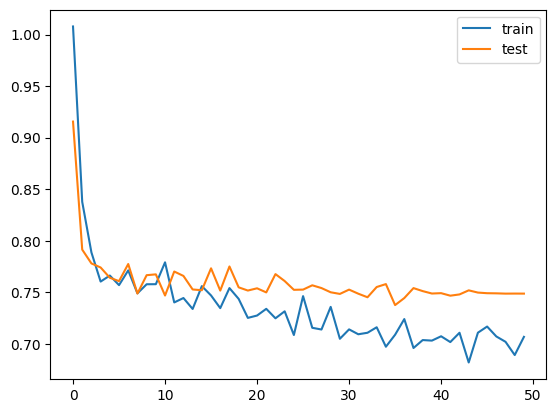

In [499]:
# Tính toán trọng số cho từng lớp
class_counts = np.bincount(y_train.numpy())  # Đếm số lượng mẫu của từng lớp
class_weights = 1.0 / class_counts           # Trọng số ngược với tần suất
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # get the device
class_weights = torch.tensor(class_weights, dtype=torch.float32, device=device) # Move class_weights to the device

new_model_pro = LSTMPredictor(input_dim, hidden_dim=85, output_dim=output_dim)
criterion = nn.CrossEntropyLoss(weight = class_weights)  # Loss cho bài toán phân loại
optimizer = optim.Adam(new_model_pro.parameters(), lr=5e-3,weight_decay=5e-4)
train1(new_model_pro,train_loader=train_loader,test_loader=test_loader,criterion=criterion,optimizer=optimizer,batch_size=256,num_epochs=50)

checkpoint = {
    "model_states": new_model_pro.state_dict(),  # trạng thái từng model
    "hidden_dim": 85,
    "input_dim": input_dim,
    "scaler" : scaler_pro
}
torch.save(checkpoint, "D:/Runway-Training-main/BE/checkpoint/RNN_checkpoint.pth")

In [500]:
checkpoint = torch.load("D:/Runway-Training-main/BE/checkpoint/RNN_checkpoint.pth", map_location=torch.device('cpu'),weights_only=False)
L = LSTMPredictor(input_dim= checkpoint['input_dim'],hidden_dim=checkpoint['hidden_dim'],output_dim=3)
L.load_state_dict(checkpoint["model_states"])
scaler_pro = checkpoint["scaler"]
L.eval()

LSTMPredictor(
  (lstm): LSTM(8, 85, batch_first=True)
  (fc): Linear(in_features=85, out_features=3, bias=True)
  (softmax): Softmax(dim=-1)
)

In [473]:
checkpoint = torch.load("D:/Runway-Training-main/BE/checkpoint/RNN_checkpoint.pth", map_location=torch.device('cpu'),weights_only=False)

In [474]:
checkpoint

{'model_states': OrderedDict([('lstm.weight_ih_l0',
               tensor([[ 4.2537e-02,  2.9021e-21,  9.6903e-03,  ..., -5.1985e-03,
                         1.0178e-03,  1.3716e-01],
                       [ 1.9389e-02, -2.7504e-25, -5.9630e-02,  ...,  2.6678e-02,
                        -8.4167e-02,  3.5243e-02],
                       [ 6.9916e-02,  2.8334e-08, -6.3521e-02,  ..., -8.7253e-02,
                         5.3972e-02,  9.8881e-02],
                       ...,
                       [ 6.0220e-02, -1.0045e-21, -1.6903e-01,  ...,  1.6251e-01,
                        -1.0416e-02, -9.2416e-02],
                       [ 9.7237e-02, -2.5741e-19, -6.3838e-02,  ..., -1.4835e-01,
                        -2.1047e-01,  1.6421e-01],
                       [ 5.5413e-02,  3.8981e-19, -8.1978e-02,  ...,  1.3372e-01,
                         7.2006e-02,  1.3714e-01]])),
              ('lstm.weight_hh_l0',
               tensor([[ 0.0158,  0.0016,  0.0205,  ..., -0.0132, -0.0227,  0.0106]

In [475]:
acc,f1,losses=evaluate_model(new_model_pro,test_loader)
print(f"Accuracy: {acc}")
print(f"F1-score: {f1}")
print(f"Loss: {losses}")

              precision    recall  f1-score   support

           0       0.54      0.93      0.68       163
           1       0.64      0.61      0.63       251
           2       0.63      0.36      0.46       266

    accuracy                           0.59       680
   macro avg       0.60      0.64      0.59       680
weighted avg       0.61      0.59      0.57       680

Accuracy: 0.5926470588235294
F1-score: 0.5889711155237778
Loss: 0.7635962719267065


#### Evaluation

In [476]:
# Tạo dữ liệu
aircraft_features=['Final-approach','Aircraft-type','Temperature','Time','Windspeed','Visibility']
runway_feautures=['Exit-location','Exit-angle']
aircraft_df=new_df[aircraft_features]
runway_df=new_df[runway_feautures]

In [477]:
runway_df.drop_duplicates(inplace=True)
# sắp xếp lại theo giá trị của exit location
runway_df.sort_values(by='Exit-location',inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20488\3970589878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.drop_duplicates(inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20488\3970589878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runway_df.sort_values(by='Exit-location',inplace=True)


In [478]:
runway_df

,Exit-location,Exit-angle
1,1750.00,30
5,1950.00,30
0,2086.35,30


In [479]:
aircraft_df.reset_index(drop=True,inplace=True)
runway_df.reset_index(drop=True,inplace=True)
# Số đặc trưng
n = runway_df.shape[1]
m = aircraft_df.shape[1]

# Khởi tạo mảng 3 chiều
array_3d = np.zeros((len(aircraft_df), len(runway_df), n + m))

# Điền giá trị vào mảng
for i, plane in aircraft_df.iterrows():
    for j, runway in runway_df.iterrows():

        plane_features = plane[:].values
        # Lấy đặc trưng runway
        runway_features = runway[:].values
        # Ghép đặc trưng
        combined_features = np.concatenate((runway_features, plane_features))
        # Điền vào mảng
        array_3d[i, j, :] = combined_features

# Kết quả
print("Kích thước mảng:", array_3d.shape)
print(array_3d)

Kích thước mảng: (3399, 3, 8)
[[[ 1.75000e+03  3.00000e+01  1.38000e+02 ...  0.00000e+00 -1.00000e+00
    8.00000e+00]
  [ 1.95000e+03  3.00000e+01  1.38000e+02 ...  0.00000e+00 -1.00000e+00
    8.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.38000e+02 ...  0.00000e+00 -1.00000e+00
    8.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.35000e+02 ...  0.00000e+00 -3.00000e+00
    6.00000e+00]
  [ 1.95000e+03  3.00000e+01  1.35000e+02 ...  0.00000e+00 -3.00000e+00
    6.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.35000e+02 ...  0.00000e+00 -3.00000e+00
    6.00000e+00]]

 [[ 1.75000e+03  3.00000e+01  1.49000e+02 ...  0.00000e+00  7.00000e+00
    7.00000e+00]
  [ 1.95000e+03  3.00000e+01  1.49000e+02 ...  0.00000e+00  7.00000e+00
    7.00000e+00]
  [ 2.08635e+03  3.00000e+01  1.49000e+02 ...  0.00000e+00  7.00000e+00
    7.00000e+00]]

 ...

 [[ 1.75000e+03  3.00000e+01  1.40000e+02 ...  0.00000e+00  0.00000e+00
    6.00000e+00]
  [ 1.95000e+03  3.00000e+01  1.40000e+02 ...  0.00000e+00  0.00000e

In [480]:
# chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
N,seq_len,M=array_3d.shape
data_reshaped = array_3d.reshape(-1, M)  # Chuyển thành mảng 2D (N*3, M)
# Chuẩn hóa dữ liệu
data_normalized_pro = scaler_pro.transform(data_reshaped)
data_normalized_rot = scaler_rot.transform(data_reshaped)

# Chuyển đổi lại thành mảng 3D Nx3xM
data_normalized_3d_pro = data_normalized_pro.reshape(N, seq_len, M)
data_normalized_3d_rot = data_normalized_rot.reshape(N, seq_len, M)

In [481]:
data_normalized_3d_pro.shape

(3399, 3, 8)

In [482]:
X_tensor_pro = torch.tensor(data_normalized_3d_pro,dtype=torch.float32)
X_tensor_pro = X_tensor_pro.to(device)
X_tensor_rot = torch.tensor(data_normalized_3d_rot,dtype=torch.float32)
X_tensor_rot = X_tensor_rot.to(device)
y_tensor_exit = torch.tensor(new_df['Exit-label'].values, dtype=torch.long)  # Cần dtype=torch.long cho CrossEntropyLoss
y_tensor_rot = torch.tensor(new_df['ROT'].values, dtype=torch.float32)

In [483]:
X_tensor_pro.shape

torch.Size([3399, 3, 8])

In [484]:
means,variances=predict_ensemble(models,X_tensor_rot)
variances_err=model_err(X_tensor_rot).squeeze()
variances_err=variances_err.cpu().detach().numpy()
variances=variances.squeeze()
variances = variances + variances_err
_,probabilities = new_model_pro(X_tensor_pro)
probabilities=probabilities.cpu().detach().numpy()
means=means.squeeze()
print(probabilities.shape)
print(variances.shape)
print(means.shape)

(3399, 3)
(3399, 3)
(3399, 3)


In [485]:
new_overall_mean,new_overall_std=overall_distribution(means, variances, probabilities)
print(f"Overall Mean: {new_overall_mean}")
print(f"Overall std: {new_overall_std}")

Overall Mean: 55.80255126953125
Overall std: 6.260966777801514


In [486]:
print(f"Overall Mean: {overall_mean}")
print(f"Overall std: {overall_std}")

Overall Mean: 57.259193420410156
Overall std: 6.354362964630127


In [487]:
# lọc ROT theo từng "exit-label"
means_A = means[new_df['Exit-label'].values == 0]
variances_A = variances[new_df['Exit-label'].values == 0]
probabilities_A = probabilities[new_df['Exit-label'].values == 0]

In [488]:
k,l=aggregate_rot_statistics(means, variances, probabilities)
print(f"Exit Mean: {k}")
print(f"Exit Std: {np.sqrt(l)}")

Exit Mean: [55.03334045 54.32029343 58.32155609]
Exit Std: [5.94715498 6.29974345 5.77159244]


In [489]:
print("probability of each exit: ",np.mean(probabilities,axis=0).T)

probability of each exit:  [0.3364191  0.35308456 0.31049594]


##### REAL

In [490]:
print("Real ROT:",mean_ROT)

Real ROT: 57.998825


In [491]:
# Tính tần suất
tansuat = df['Exit-label'].value_counts()
# Tính tần suất và tỷ lệ phần trăm
tansuat_phantram = df['Exit-label'].value_counts(normalize=True)

print(tansuat_phantram)

Exit-label
1    0.743454
0    0.256546
Name: proportion, dtype: float64


In [492]:
# Tính trung bình của ROT cho từng loại Exit-label
trung_binh_ROT = df.groupby('Exit-label')['ROT'].mean()

print(trung_binh_ROT)

Exit-label
0    55.053899
1    59.015038
Name: ROT, dtype: float64


#### Test

In [493]:
aircraft_type_map = {
    "Heavy": 0,
    "Light":1,
    "Medium":2
}
time_map = {
    "Day":0,
    "Night":1
}
def preprocess_df(df):
    df['Aircraft-type'] = df['Aircraft-type'].map(aircraft_type_map)
    df['Time'] = df['Time'].map(time_map)  
    return df 

runway_df = {
    'Exit-location':[1750,1950,2086.35],
    'Exit-angle':[30,30,30],
}


aircraft_df = {
    'Final-approach':[150],
    'Aircraft-type':["Medium"],
    'Temperature':[30],
    'Time':["Night"],
    'Windspeed':[2],
    'Visibility':[9.0]
}

aircraft_df = preprocess_df(pd.DataFrame(aircraft_df))
runway_df = pd.DataFrame(runway_df)
# Khởi tạo mảng 3 chiều
array_3d = np.zeros((len(aircraft_df), len(runway_df), n + m))

# Điền giá trị vào mảng
for i, plane in aircraft_df.iterrows():
    for j, runway in runway_df.iterrows():

        plane_features = plane[:].values
        # Lấy đặc trưng runway
        runway_features = runway[:].values
        # Ghép đặc trưng
        combined_features = np.concatenate((runway_features, plane_features))
        # Điền vào mảng
        array_3d[i, j, :] = combined_features

# Kết quả
print("Kích thước mảng:", array_3d.shape)
print(array_3d)

Kích thước mảng: (1, 3, 8)
[[[1.75000e+03 3.00000e+01 1.50000e+02 2.00000e+00 3.00000e+01
   1.00000e+00 2.00000e+00 9.00000e+00]
  [1.95000e+03 3.00000e+01 1.50000e+02 2.00000e+00 3.00000e+01
   1.00000e+00 2.00000e+00 9.00000e+00]
  [2.08635e+03 3.00000e+01 1.50000e+02 2.00000e+00 3.00000e+01
   1.00000e+00 2.00000e+00 9.00000e+00]]]


In [494]:
N,seq_len,M=array_3d.shape
data_reshaped = array_3d.reshape(-1, M)  # Chuyển thành mảng 2D (N*3, M)
# Chuẩn hóa dữ liệu
data_normalized_pro = scaler_pro.transform(data_reshaped)
data_normalized_rot = scaler_rot.transform(data_reshaped)

# Chuyển đổi lại thành mảng 3D Nx3xM
data_normalized_3d_pro = data_normalized_pro.reshape(N, seq_len, M)
data_normalized_3d_rot = data_normalized_rot.reshape(N, seq_len, M)

X_tensor_pro = torch.tensor(data_normalized_3d_pro,dtype=torch.float32)
X_tensor_pro = X_tensor_pro.to(device)
X_tensor_rot = torch.tensor(data_normalized_3d_rot,dtype=torch.float32)
X_tensor_rot = X_tensor_rot.to(device)

In [495]:
means,variances=predict_ensemble(models,X_tensor_rot)
_,probabilities = new_model_pro(X_tensor_pro)
probabilities=probabilities.cpu().detach().numpy()
means=means.squeeze()
best_index = np.argmax(probabilities)
print("Xác suất sử dụng lối thoát thứ {}, là: {}".format(best_index+1,probabilities[0][best_index]))
print("ROT trung bình khi sử dụng lối thoát thứ {} là: {}".format(best_index+1,means[best_index]))

Xác suất sử dụng lối thoát thứ 2, là: 0.7912645936012268
ROT trung bình khi sử dụng lối thoát thứ 2 là: 54.3788948059082
